In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gc
import os
import glob
import os.path as osp
from PIL import Image
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils import data as D
import torch.nn as nn

In [2]:
path = './all/train_images/'

## Make class for the dataset
Following the tutorial on:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel
This class contains the resize and normalize transformations

In [3]:
import torch
from torch.utils import data

class PlanktonDS(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, root, list_IDs, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs
        
        
        self.filenames = []
        self.root = root
        self.transform = transforms.Compose([
    transforms.Resize((32,32)), ## @Delano ik heb dit veranderd want CNN tutorial heeft dit ook is voor nu even makkelijker MAAR DIT IS NIET JUIST WANT DE PLAATJES ZIJN TE KLEIN NU 
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        filenames = glob.glob(osp.join(path, '*.jpg'))
        for fn in filenames:
            self.filenames.append(fn)

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = Image.open(self.filenames[index])
        y = self.labels[ID]

        return self.transform(X), y

## Hyperparameters

In [4]:
# Batch size as used in the DataLoader
batch_size = 1

## Loading the labels 

In [5]:
labels_read = pd.read_csv('./all/train_onelabel.csv')
images = labels_read['image'].tolist()
import random
random.shuffle(images)

threshold = int(len(images) *0.7)

partition = {}
partition['train'] = images[:threshold]
partition['validation'] = images[threshold:]


labels = dict(zip(labels_read['image'], labels_read['class'])) 


In [6]:
#Loading the actual data
training_set = PlanktonDS(path, partition['train'], 
                               labels)
training_generator = data.DataLoader(dataset=training_set,
                                           batch_size=batch_size,
                                           shuffle=True)

validation_set = PlanktonDS(path, partition['validation'], 
                               labels)
validation_generator = data.DataLoader(dataset=validation_set,
                                           batch_size=batch_size,
                                           shuffle=True)


In [44]:
num_classes = pd.read_csv('./all/label_map.txt').shape[0]
print('The number of classes is:',num_classes)



The number of classes is: 120


## EDA

tensor([12])


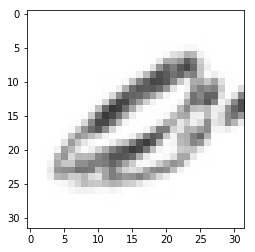

In [8]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(training_generator)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
print(labels)

In [9]:
print('The length of training set is:' ,len(training_generator))
print('The length of validation set is:' ,len(validation_generator))

The length of training set is: 16942
The length of validation set is: 7262


In [10]:
# How big is an image
for i in range(3):
    image = training_set[i]
    print(image[0].shape)

torch.Size([1, 32, 32])
torch.Size([1, 32, 32])
torch.Size([1, 32, 32])


In [22]:
training_set[0]

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]]]), 50)

In [26]:
training_set[0][0]

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         ...,
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]]])

In [40]:
for i in range(len(training_set)):
    print(training_set[i][1])

50
11
29
88
92
3
49
17
12
99
36
114
0
58
8
58
84
60
84
36
12
48
53
101
46
14
84
101
0
49
100
101
46
1
67
58
8
119
56
89
68
99
72
12
58
58
21
67
70
110
17
53
45
43
99
32
8
84
111
94
40
43
58
38
27
99
70
100
24
61
34
67
105
16
0
67
99
12
101
69
89
64
119
3
61
3
74
49
101
105
99
94
89
55
8
117
45
82
67
84
34
84
58
1
81
43
12
46
12
47
117
58
17
48
58
32
3
84
113
101
100
84
31
119
58
28
63
16
84
12
45
6
58
99
100
84
26
58
23
34
92
84
12
80
11
76
45
3
13
99
4
104
84
34
81
11
81
65
71
43
31
104
34
2
35
84
42
105
11
0
8
6
39
34
58
48
26
100
17
45
104
0
105
59
28
88
101
1
11
100
58
117
32
38
26
101
49
36
58
94
20
100
100
8
28
58
84
67
117
113
84
3
84
26
100
0
45
101
26
53
114
31
59
43
58
114
26
84
58
89
26
84
105
58
32
119
112
99
12
17
84
119
70
21
31
100
100
17
24
26
12
61
43
58
3
66
104
12
5
36
82
105
3
34
101
26
3
58
14
64
105
45
58
105
114
100
111
97
11
0
112
84
32
8
23
101
84
32
117
84
58
105
66
31
70
61
45
118
12
53
18
12
74
11
70
32
61
3
101
26
94
43
8
11
53
104
112
67
84
99
58
49
38
58


61
72
12
8
50
58
99
76
117
3
6
66
8
78
27
88
84
3
73
70
12
31
24
31
99
34
72
100
24
36
12
84
36
31
99
19
94
116
78
53
84
94
21
12
100
61
58
84
52
84
3
74
16
18
8
12
84
117
119
36
56
11
69
105
100
49
22
1
24
61
105
8
34
104
99
103
6
58
105
58
45
12
1
49
84
58
8
58
11
8
3
12
45
34
31
29
103
62
37
48
35
27
93
11
0
101
105
58
34
17
99
105
3
104
60
22
109
58
3
45
101
23
70
100
92
8
84
61
12
0
44
12
58
12
22
3
8
67
101
32
100
2
56
111
100
58
45
70
84
61
67
103
119
43
43
31
72
32
101
100
12
26
8
12
8
49
11
97
74
27
84
67
92
6
49
100
113
27
45
31
2
107
17
105
84
42
60
84
70
84
26
66
63
105
64
6
70
43
21
67
6
24
8
117
119
58
43
59
23
17
29
3
66
19
1
45
3
58
36
26
100
0
23
109
117
42
67
67
43
12
81
68
112
12
55
61
112
32
4
49
32
8
101
84
105
42
80
101
64
61
42
29
32
84
101
58
12
84
8
58
45
53
84
58
45
58
76
94
5
8
42
58
26
36
43
101
74
12
8
32
61
99
104
36
43
21
66
58
105
43
105
84
34
12
58
61
26
42
119
117
34
45
105
81
84
97
36
26
61
74
67
113
32
48
51
58
45
119
0
84
20
84
67
8
31
12
38
58
84
1

101
34
42
27
4
57
31
101
84
43
84
0
51
4
55
21
5
53
58
23
0
117
68
53
84
49
27
67
58
58
99
58
24
56
81
34
12
27
56
42
45
46
27
45
12
74
26
17
105
105
60
78
58
3
105
3
49
27
113
84
99
45
100
11
105
97
49
80
43
105
101
110
33
58
58
70
101
20
8
24
12
24
67
77
88
84
73
3
105
58
3
73
0
111
31
8
29
45
45
119
12
0
12
100
53
21
45
24
64
18
74
38
12
84
12
64
58
3
58
17
110
60
105
58
66
31
61
56
22
32
35
119
3
27
34
1
45
60
31
26
59
98
81
6
116
0
26
105
36
72
101
61
84
12
84
12
84
53
0
12
58
93
5
101
84
110
8
119
84
32
36
3
56
100
32
49
17
27
35
70
101
49
36
43
26
28
21
61
12
113
53
58
5
34
105
3
84
3
84
58
58
24
58
0
26
84
99
49
58
53
80
21
101
42
108
94
58
49
11
70
56
84
84
70
116
7
100
113
70
72
73
8
61
53
9
94
28
44
58
50
66
68
34
12
53
12
81
24
45
21
76
105
84
14
105
69
28
92
32
32
67
101
4
59
70
111
21
53
111
34
53
84
28
53
67
34
104
11
32
58
34
58
84
119
117
42
84
102
95
101
53
67
105
3
58
84
8
27
117
21
18
45
117
117
27
3
27
32
6
12
113
45
43
45
12
84
117
84
34
58
105
11
3
45
44
100
84
4

61
75
101
45
53
8
16
45
73
22
60
78
117
0
26
111
32
12
111
53
99
32
4
113
22
59
34
45
94
100
3
84
105
104
45
89
64
58
20
31
76
100
113
45
31
111
111
26
84
56
9
89
4
45
35
9
29
88
96
39
26
63
58
16
111
114
12
1
12
100
36
84
105
104
101
53
58
99
84
119
58
24
6
7
89
47
53
105
70
84
27
117
26
8
60
100
18
105
3
53
70
11
80
58
51
94
34
8
100
8
61
0
72
101
11
101
66
101
67
3
42
100
94
63
81
70
31
26
100
43
53
94
58
45
1
117
32
58
117
119
101
21
84
38
99
67
3
114
84
53
101
105
49
3
101
7
99
24
67
88
58
105
105
58
117
111
76
98
99
58
67
27
41
100
92
0
46
67
6
49
61
27
59
46
94
34
1
101
64
21
117
87
0
105
24
105
8
67
46
89
103
12
58
94
12
100
17
5
84
43
99
116
99
11
12
2
63
73
58
31
69
58
100
100
3
11
16
73
0
58
113
32
100
117
45
58
67
31
0
105
76
5
100
99
117
3
105
34
58
114
67
81
58
44
26
81
63
101
118
105
100
58
84
91
92
58
102
74
51
34
43
7
46
91
42
76
64
101
0
63
105
29
23
34
104
67
100
3
29
1
100
58
38
32
56
84
58
58
34
3
67
56
113
21
104
104
84
27
101
61
11
3
3
80
17
105
12
2
105
45
26
29

58
31
101
11
4
45
99
26
58
101
119
11
43
81
84
58
84
117
12
58
101
58
29
117
31
34
70
27
53
84
84
45
27
8
113
58
100
100
49
58
84
84
84
67
12
84
26
99
63
23
84
67
84
31
105
45
26
53
36
105
20
67
87
31
3
100
17
94
105
31
51
58
66
46
3
84
37
7
49
26
105
105
105
117
104
99
105
0
67
28
61
22
73
58
17
58
84
58
18
88
105
36
0
101
26
99
105
1
101
3
16
58
36
84
61
50
21
84
99
101
110
31
3
12
101
8
21
94
12
2
70
104
6
24
67
3
84
34
26
100
60
32
26
110
113
45
99
81
58
100
70
56
11
49
58
8
92
6
101
84
45
26
0
81
112
11
103
104
84
5
73
84
64
89
3
8
82
114
21
3
85
66
0
117
29
99
84
38
70
56
8
67
84
117
40
99
45
46
3
43
105
119
26
105
84
27
34
3
1
100
119
0
11
24
90
58
101
21
101
70
104
58
84
21
110
70
99
105
5
12
117
45
8
67
4
105
113
32
81
70
104
31
67
58
94
19
11
6
21
58
0
34
99
105
27
20
22
14
12
31
0
38
32
43
26
104
11
101
117
68
84
70
84
18
17
119
67
45
3
53
3
12
6
24
58
43
3
45
27
32
60
8
45
45
117
3
5
104
99
67
81
99
117
43
12
32
31
6
8
103
74
53
11
58
32
84
24
36
99
76
100
105
26
119
12
26


23
64
104
11
99
24
75
40
119
53
105
117
12
59
44
105
117
100
67
100
119
42
12
53
84
114
73
58
45
92
31
109
84
26
6
24
58
28
24
53
4
11
0
105
103
58
58
101
32
70
34
5
53
58
58
3
101
68
100
105
32
113
58
58
84
111
117
21
45
45
26
74
97
26
66
61
43
105
111
3
34
105
68
117
72
101
34
84
84
118
70
11
81
117
70
65
12
84
61
32
34
26
70
53
89
104
6
45
34
94
12
99
3
53
66
100
100
8
101
32
4
12
58
12
119
101
32
24
56
119
104
58
111
18
38
84
26
99
99
84
45
84
101
105
84
3
84
28
84
100
45
84
26
45
60
89
31
32
105
32
100
61
99
58
34
21
12
117
34
24
34
26
11
117
78
58
84
42
105
31
27
84
61
3
110
58
43
12
32
12
56
22
100
113
43
99
117
12
78
3
111
1
105
61
3
61
56
84
43
101
0
12
94
84
27
32
20
45
58
64
73
12
34
105
42
29
22
83
105
61
94
101
61
58
18
3
53
8
3
101
84
29
119
84
113
101
101
21
107
34
12
42
84
32
32
105
100
88
19
61
119
8
58
70
61
82
21
67
12
53
24
70
15
21
75
105
34
3
67
58
40
99
111
97
104
68
99
27
101
58
0
119
20
58
84
119
84
100
99
5
58
53
61
116
16
84
70
113
84
46
84
4
84
21
34
36
3
0


58
75
26
89
43
18
44
36
70
26
47
105
67
94
5
7
27
58
101
50
84
70
27
84
84
52
58
1
32
26
73
43
40
45
84
100
58
5
67
101
72
64
99
73
35
74
32
21
58
46
27
119
8
45
31
100
32
70
40
117
8
27
99
3
0
74
12
99
100
97
15
99
27
99
24
68
0
45
84
8
99
56
8
58
7
111
92
21
22
26
101
76
70
26
74
72
99
34
110
58
73
74
118
100
75
61
47
45
12
99
81
25
86
32
11
50
58
36
27
105
58
70
70


## Structure of DL
Tutorial https://blog.algorithmia.com/convolutional-neural-nets-in-pytorch/

In [49]:
from torch.autograd import Variable
import torch.nn.functional as F

class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        #Input channels = 3, output channels = 18
        self.conv1 = torch.nn.Conv2d(1, 18, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #4608 input features, 64 output features (see sizing flow below)
        self.fc1 = torch.nn.Linear(1 * 35 * 35, 64)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = torch.nn.Linear(64, num_classes)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        #Size changes from (3, 32, 32) to (18, 32, 32)
        x = F.relu(self.conv1(x))
        print('1', x.shape)
        #Size changes from (18, 32, 32) to (18, 16, 16)
        x = self.pool(x)
        print('2', x.shape)
        #Reshape data to input to the input layer of the neural net
        #Size changes from (18, 16, 16) to (1, 4608)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 18 * 16 *16)
        print('3', x.shape)
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 4608) to (1, 64)
        x = F.relu(self.fc1(x))
        print('4', x.shape)
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 64) to (1, 10)
        x = self.fc2(x)
        print('5', x.shape)
        return(x)

In [46]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    
    #Loss function
    loss = torch.nn.CrossEntropyLoss()
    
    #Optimizer
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    return(loss, optimizer)

In [47]:
import time

def trainNet(net, batch_size, n_epochs, learning_rate):
    
    #Print all of the hyperparameters of the training iteration:
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    #Get training data
    train_loader = training_generator
    n_batches = len(train_loader)
    
    #Create our loss and optimizer functions
    loss, optimizer = createLossAndOptimizer(net, learning_rate)
    
    #Time for printing
    training_start_time = time.time()
    
    #Loop for n_epochs
    for epoch in range(n_epochs):
        
        running_loss = 0.0
        print_every = n_batches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, data in enumerate(train_loader, 0):
            
            #Get inputs
            inputs, labels = data
            
            #Wrap them in a Variable object
            inputs, labels = Variable(inputs), Variable(labels)
            
            #Set the parameter gradients to zero
            optimizer.zero_grad()
            
            #Forward pass, backward pass, optimize
            outputs = net(inputs)
            loss_size = loss(outputs, labels)
            loss_size.backward()
            optimizer.step()
            
            #Print statistics
            running_loss += loss_size.data[0]
            total_train_loss += loss_size.data[0]
            
            #Print every 10th batch of an epoch
            if (i + 1) % (print_every + 1) == 0:
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                        epoch+1, int(100 * (i+1) / n_batches), running_loss / print_every, time.time() - start_time))
                #Reset running loss and time
                running_loss = 0.0
                start_time = time.time()
            
        #At the end of the epoch, do a pass on the validation set
        total_val_loss = 0
        for inputs, labels in val_loader:
            
            #Wrap tensors in Variables
            inputs, labels = Variable(inputs), Variable(labels)
            
            #Forward pass
            val_outputs = net(inputs)
            val_loss_size = loss(val_outputs, labels)
            total_val_loss += val_loss_size.data[0]
            
        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))
        
    print("Training finished, took {:.2f}s".format(time.time() - training_start_time))

In [50]:
CNN = SimpleCNN()
trainNet(CNN, batch_size=5, n_epochs=15, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 5
epochs= 15
learning_rate= 0.001
1 torch.Size([1, 18, 32, 32])
2 torch.Size([1, 18, 16, 16])
3 torch.Size([1, 4608])


RuntimeError: size mismatch, m1: [1 x 4608], m2: [1225 x 64] at c:\new-builder_3\win-wheel\pytorch\aten\src\th\generic/THTensorMath.cpp:2070